<a href="https://colab.research.google.com/github/chandini2595/Dimensionality_Reduction/blob/main/Dimensionality_Reduction_Image_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install umap-learn tensorflow matplotlib seaborn

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_olivetti_faces, load_digits
from sklearn.decomposition import PCA, KernelPCA, IncrementalPCA, FactorAnalysis
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding, MDS
from sklearn.preprocessing import StandardScaler
import umap
from keras.layers import Input, Dense
from keras.models import Model

In [10]:
# Set up visualization function
def plot_embedding(data, target, title):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(data[:, 0], data[:, 1], c=target, cmap="viridis", alpha=0.7)
    plt.colorbar(scatter)
    plt.title(title)
    plt.show()

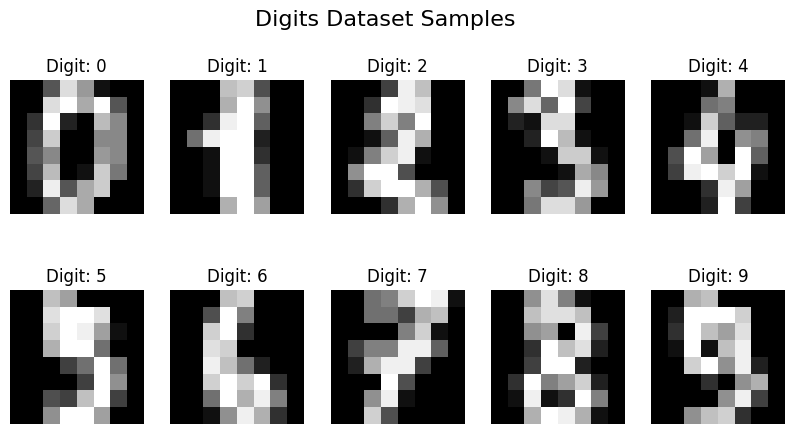

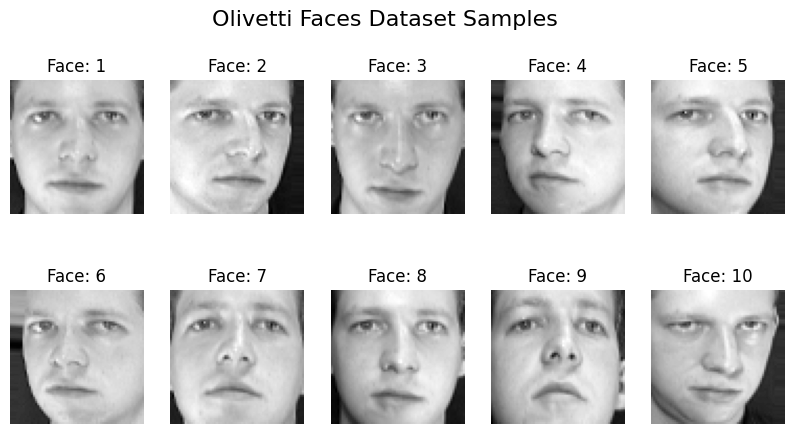

In [24]:
# Load image datasets
digits = load_digits()
olivetti_faces = fetch_olivetti_faces()
# Visualize the first few images of the digits dataset
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Digit: {digits.target[i]}")
    plt.axis('off')
plt.suptitle("Digits Dataset Samples", fontsize=16)
plt.show()

# Visualize the first few images of the Olivetti faces dataset
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(olivetti_faces.images[i], cmap='gray')
    plt.title(f"Face: {i+1}")
    plt.axis('off')
plt.suptitle("Olivetti Faces Dataset Samples", fontsize=16)
plt.show()

In [12]:
# Preprocess data
digits_data = StandardScaler().fit_transform(digits.data)
faces_data = StandardScaler().fit_transform(olivetti_faces.data)

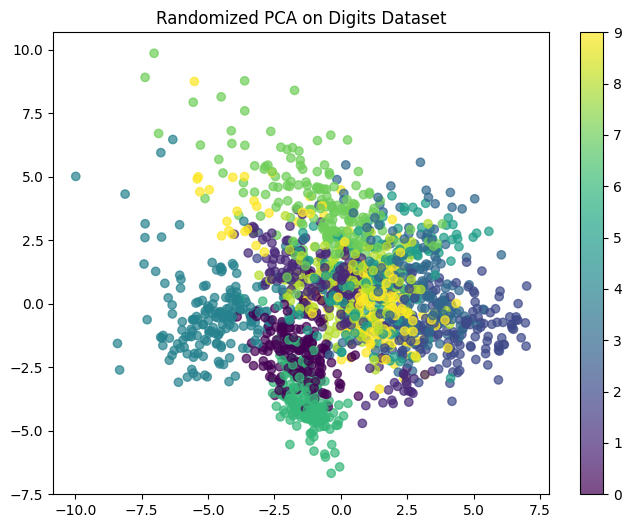

In [13]:
# 1. Randomized PCA
pca = PCA(n_components=2, svd_solver='randomized')
digits_pca = pca.fit_transform(digits_data)
plot_embedding(digits_pca, digits.target, "Randomized PCA on Digits Dataset")

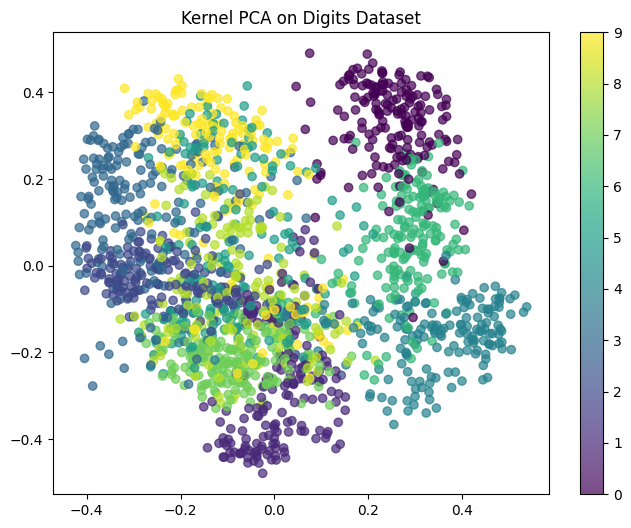

In [14]:
# 2. Kernel PCA
kernel_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.01)
digits_kpca = kernel_pca.fit_transform(digits_data)
plot_embedding(digits_kpca, digits.target, "Kernel PCA on Digits Dataset")

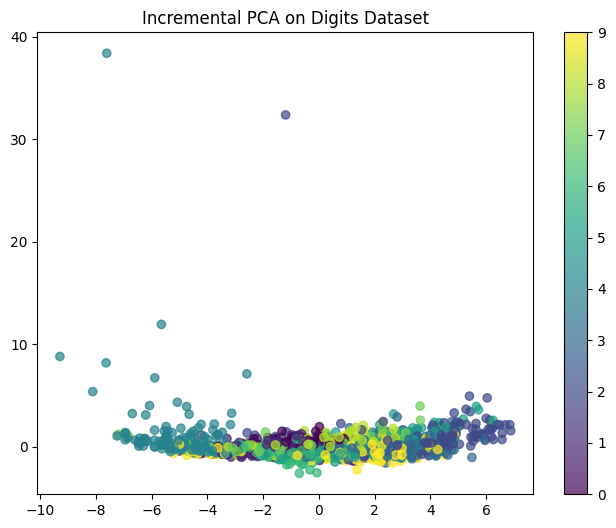

In [15]:
# 3. Incremental PCA
incremental_pca = IncrementalPCA(n_components=2, batch_size=10)
digits_ipca = incremental_pca.fit_transform(digits_data)
plot_embedding(digits_ipca, digits.target, "Incremental PCA on Digits Dataset")

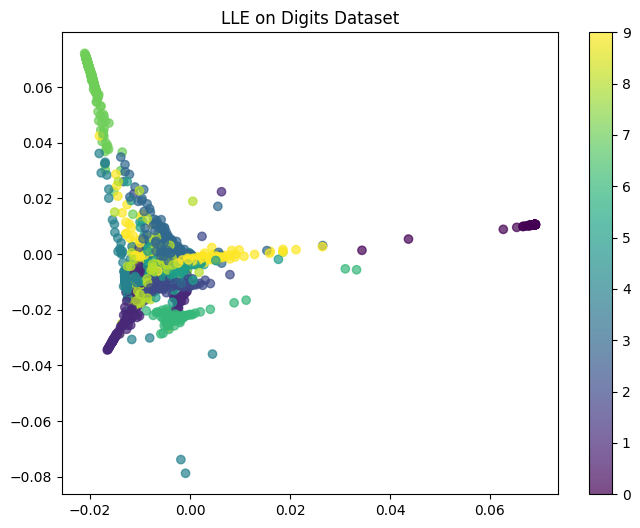

In [16]:
# 4. Locally Linear Embedding (LLE)
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
digits_lle = lle.fit_transform(digits_data)
plot_embedding(digits_lle, digits.target, "LLE on Digits Dataset")

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


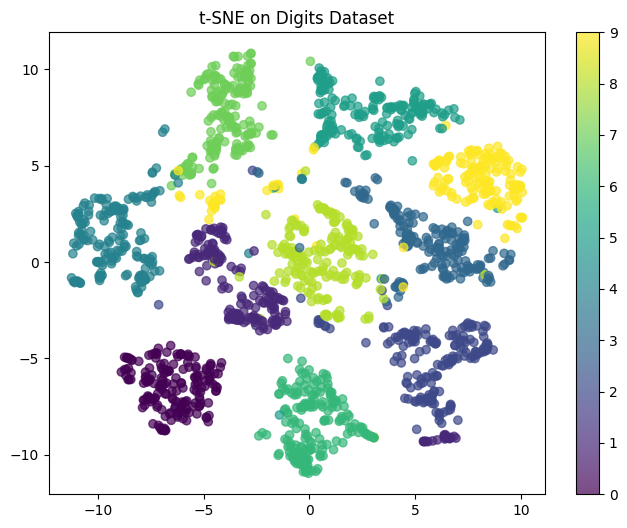

In [17]:
# 5. t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
digits_tsne = tsne.fit_transform(digits_data)
plot_embedding(digits_tsne, digits.target, "t-SNE on Digits Dataset")

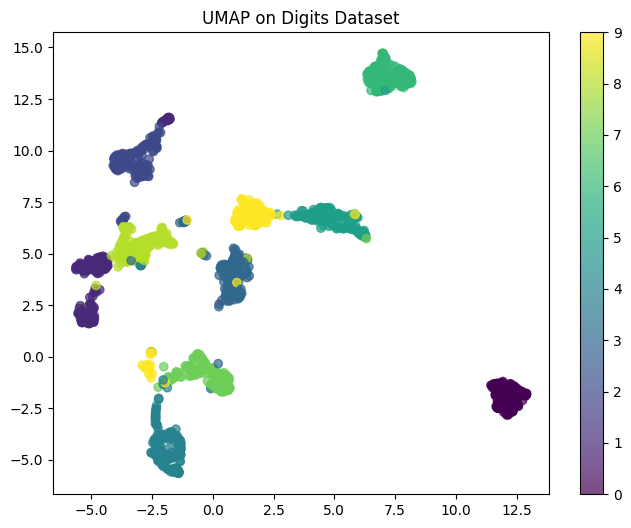

In [18]:
# 6. UMAP
umap_reducer = umap.UMAP(n_components=2)
digits_umap = umap_reducer.fit_transform(digits_data)
plot_embedding(digits_umap, digits.target, "UMAP on Digits Dataset")


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 3 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


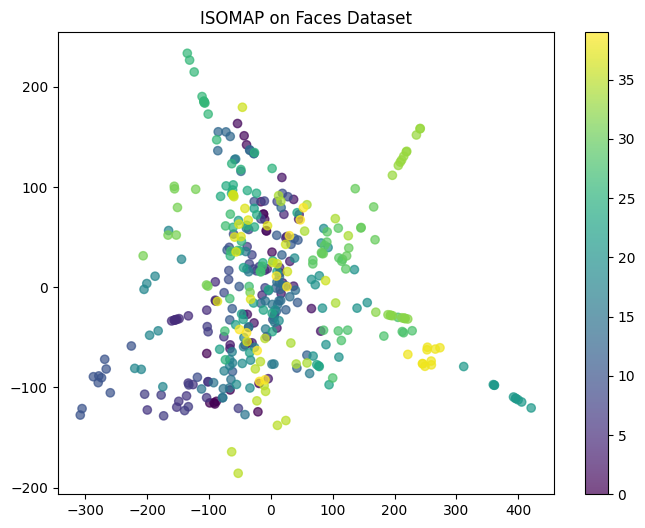

In [19]:
# 7. ISOMAP
isomap = Isomap(n_components=2)
faces_isomap = isomap.fit_transform(faces_data)
plot_embedding(faces_isomap, olivetti_faces.target, "ISOMAP on Faces Dataset")


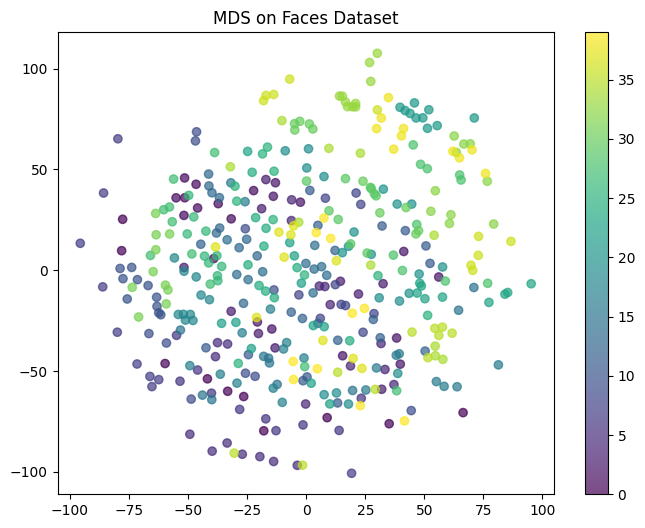

In [20]:
# 8. MDS
mds = MDS(n_components=2, random_state=42)
faces_mds = mds.fit_transform(faces_data)
plot_embedding(faces_mds, olivetti_faces.target, "MDS on Faces Dataset")

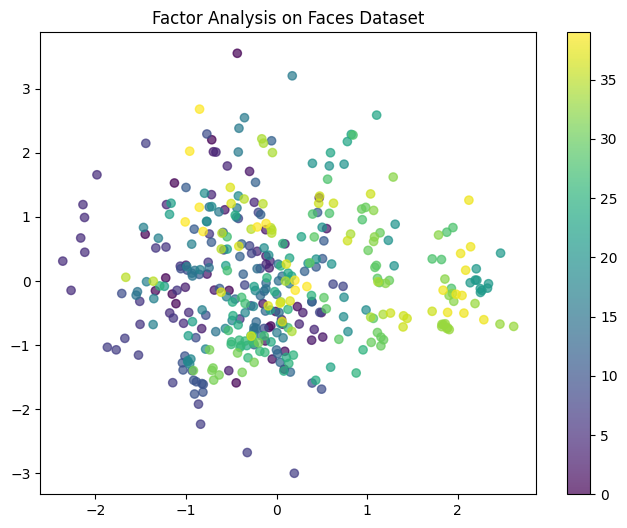

In [21]:
# 9. Factor Analysis
factor_analysis = FactorAnalysis(n_components=2)
faces_fa = factor_analysis.fit_transform(faces_data)
plot_embedding(faces_fa, olivetti_faces.target, "Factor Analysis on Faces Dataset")

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


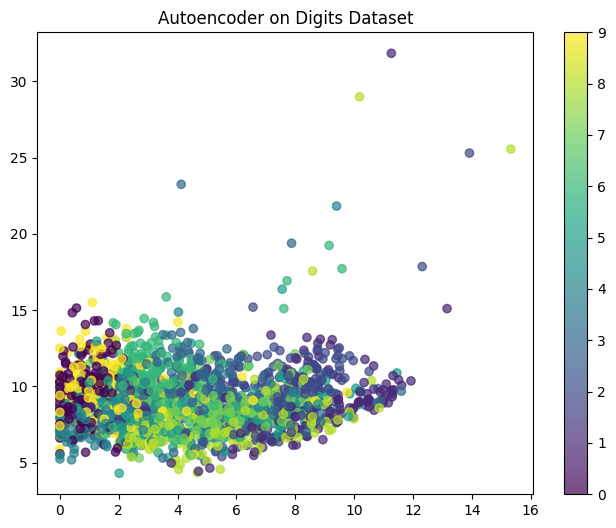

In [22]:
# 10. Autoencoder
input_dim = digits_data.shape[1]
input_layer = Input(shape=(input_dim,))
encoder = Dense(64, activation='relu')(input_layer)
encoder = Dense(32, activation='relu')(encoder)
encoder = Dense(2, activation='relu')(encoder)
decoder = Dense(32, activation='relu')(encoder)
decoder = Dense(64, activation='relu')(decoder)
decoder = Dense(input_dim, activation='sigmoid')(decoder)
autoencoder = Model(input_layer, decoder)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(digits_data, digits_data, epochs=10, batch_size=256, verbose=0)
encoder_model = Model(input_layer, encoder)
digits_autoencoded = encoder_model.predict(digits_data)
plot_embedding(digits_autoencoded, digits.target, "Autoencoder on Digits Dataset")